importaning the dependencies:


---


*    numpy: makes numpy arrays (arrays are lists in python).
*   pandas: creates data frames(structured table out of csv data file).

*  train_test_split:slipts orignal data into training and test data.
*   LogisticRegression: lets us use logistic regression.
*   accurancy_score: checks how well our model is performing.









In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import StandardScaler
from sys import implementation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras




In [ ]:
#https://www.kaggle.com/datasets/ritwikb3/heart-disease-cleveland/data

Data collection and preprocessing

---


*   checking how to print different things from the dataset.







# Pre-processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive')

In [ ]:
heart_data=('/content/drive/MyDrive/Heart_disease_cleveland_new.csv')
heart_data = pd.read_csv(heart_data)

In [ ]:
1 #print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [ ]:
1 #print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1
302,38,1,2,138,175,0,0,173,0,0.0,0,0,1,0


In [ ]:
1 #check rows and coloums in the dataset
heart_data.shape

(303, 14)

In [ ]:
1 #getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
1 #checking the missing values:
heart_data.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

analyse the data more:

In [ ]:
1 #statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


when target is 0 it means the person does not have heart disease.

---



if it is 1 then the person has heart disease.

---
---




In [ ]:
1 # checking the distribution of the target variable. finds how many 0 and 1 are there.
heart_data['target'].value_counts()


0    164
1    139
Name: target, dtype: int64

1 ---- heart disease

0 ---- no heart disease




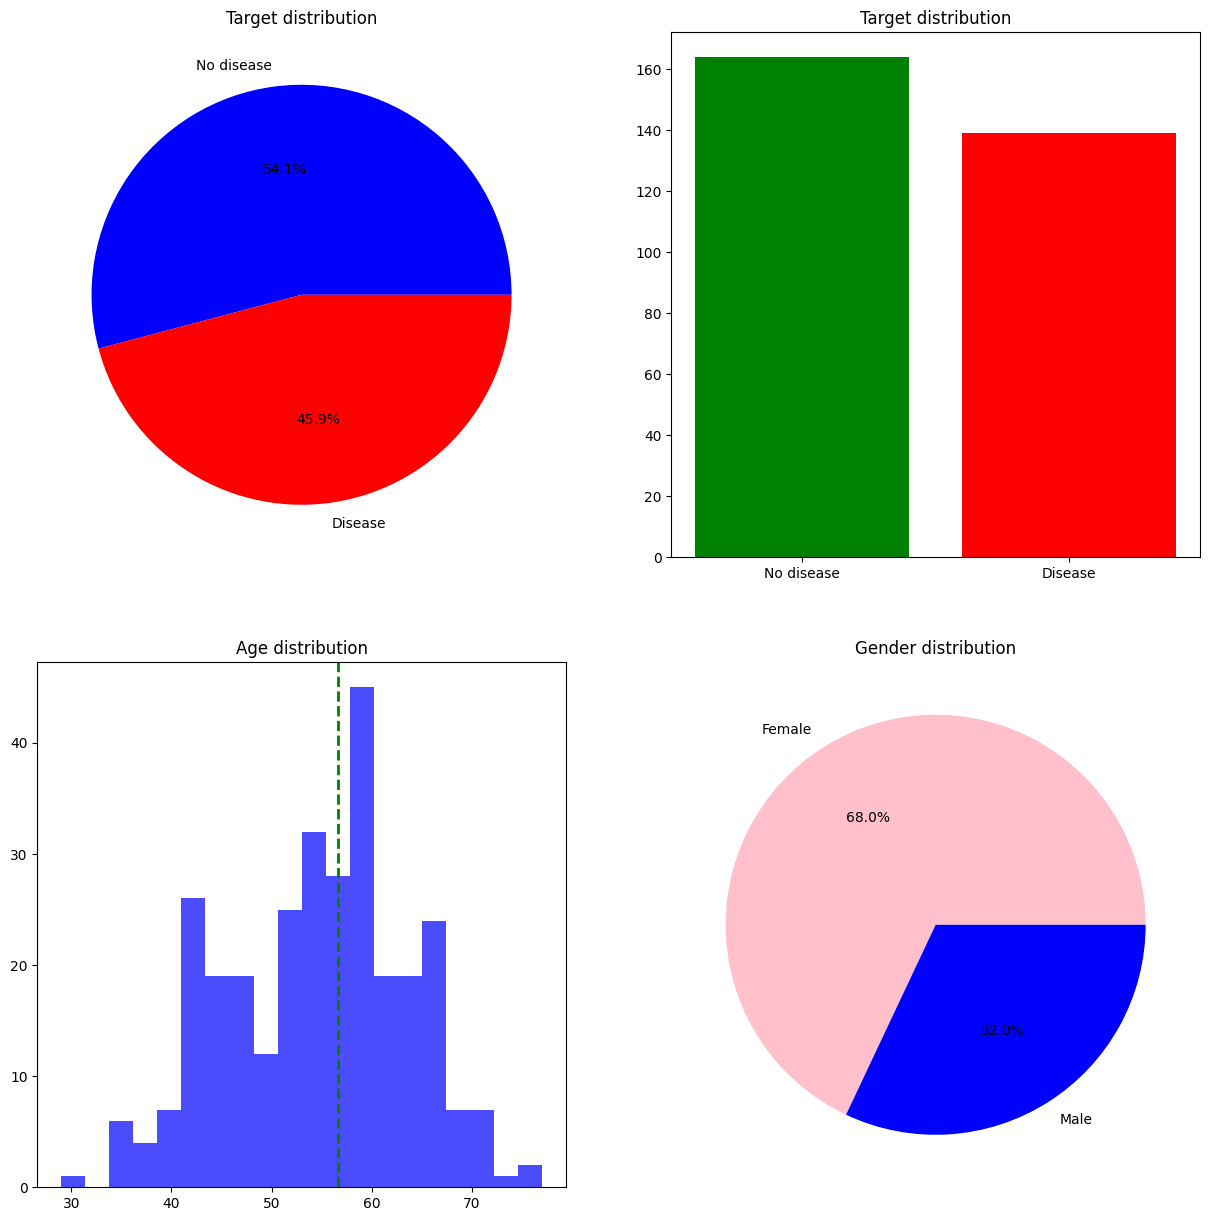

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Target distribution - Pie chart
target_counts = heart_data['target'].value_counts()
axs[0, 0].pie(target_counts, labels=['No disease', 'Disease'], autopct='%1.1f%%', colors=['blue', 'red'])
axs[0, 0].set_title('Target distribution')

# Target distribution - Bar chart
target_counts = heart_data.groupby('target').count()['age']
axs[0, 1].bar(['No disease', 'Disease'], target_counts, color=['green', 'red'])
axs[0, 1].set_title('Target distribution')

# Age distribution - Histogram with mean line
axs[1, 0].hist(heart_data['age'], bins=20, color='blue', alpha=0.7)
axs[1, 0].axvline(x=heart_data[heart_data['target'] == 1]['age'].mean(), color='green', linestyle='dashed', linewidth=2)
axs[1, 0].set_title('Age distribution')

# Gender distribution - Pie chart
sex_counts = heart_data['sex'].value_counts()
axs[1, 1].pie(sex_counts, labels=['Female', 'Male'], autopct='%1.1f%%', colors=['pink', 'blue'])
axs[1, 1].set_title('Gender distribution')

plt.show()

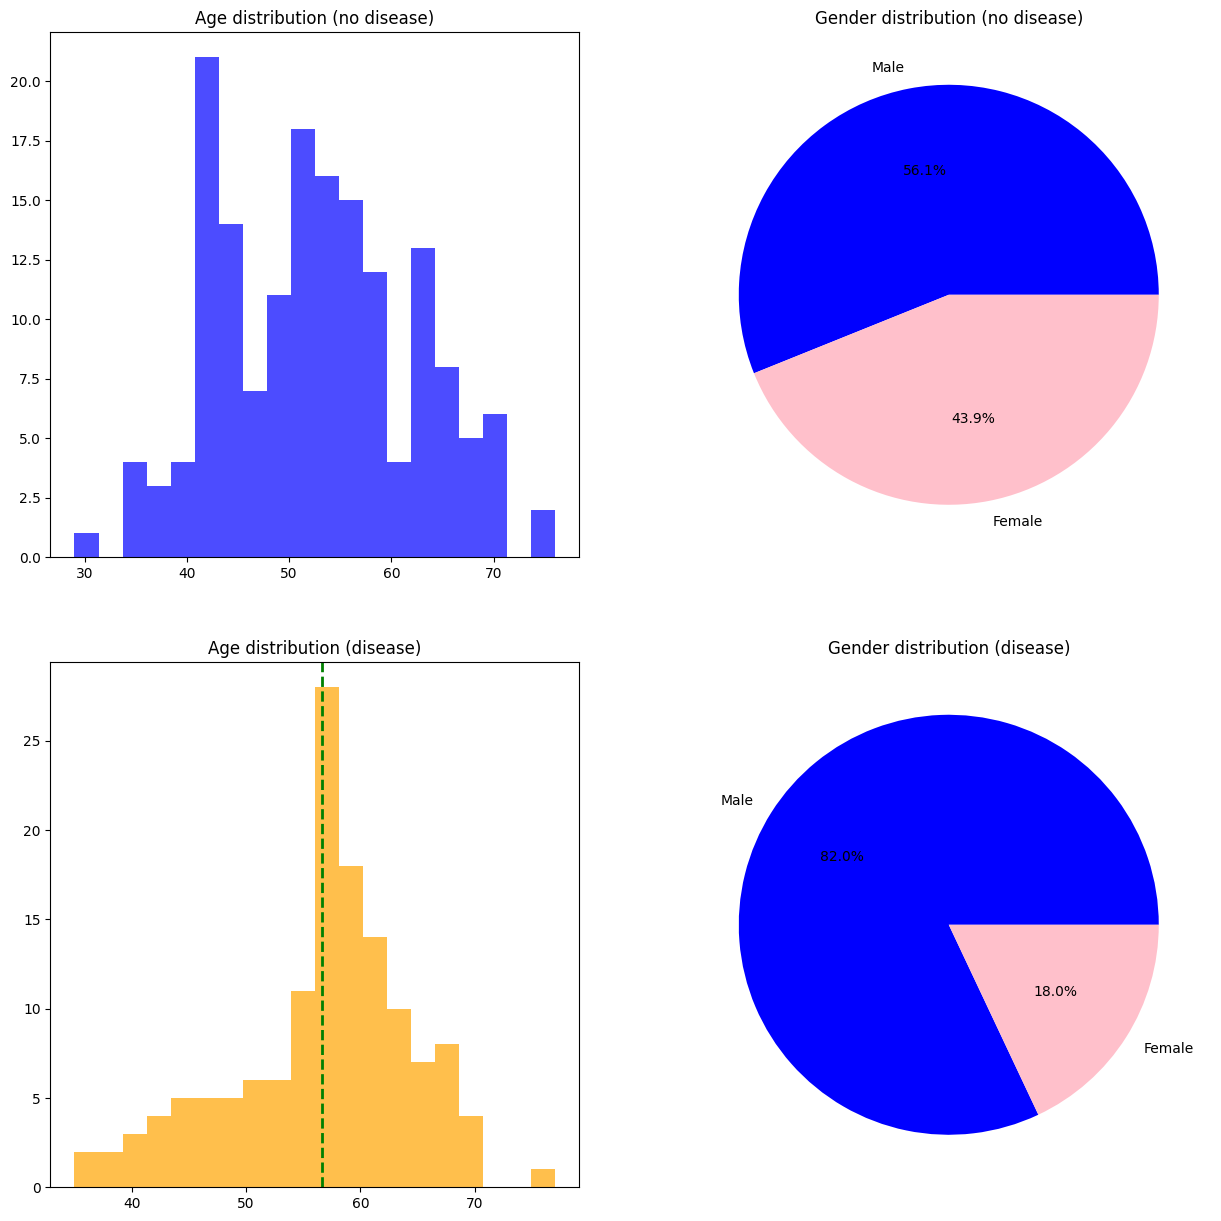

In [ ]:

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

#Assuming you have data loaded into df_0 and df_1
heart_data_1=heart_data[heart_data['target']==1]
heart_data_0=heart_data[heart_data['target']==0]

#Age distribution (no disease) - Histogram
age_counts_no_disease = heart_data_0['age'].value_counts()
axs[0, 0].hist(heart_data_0['age'], bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('Age distribution (no disease)')

#Gender distribution (no disease) - Pie chart
sex_counts_no_disease = heart_data_0['sex'].value_counts()
axs[0, 1].pie(sex_counts_no_disease, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['blue', 'pink'])
axs[0, 1].set_title('Gender distribution (no disease)')

#Age distribution (disease) - Histogram with mean line
age_counts_disease = heart_data_1['age'].value_counts()
axs[1, 0].hist(heart_data_1['age'], bins=20, color='orange', alpha=0.7)
axs[1, 0].axvline(x=heart_data_1[heart_data_1['target'] == 1]['age'].mean(), color='green', linestyle='dashed', linewidth=2)
axs[1, 0].set_title('Age distribution (disease)')

# Gender distribution (disease) - Pie chart
sex_counts_disease = heart_data_1['sex'].value_counts()
axs[1, 1].pie(sex_counts_disease, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['blue', 'pink'])
axs[1, 1].set_title('Gender distribution (disease)')

plt.show()


In [ ]:
#average value for each attributes who has heart disesase
heart_disease_data = heart_data[heart_data['target'] == 1]

# Display average values of different attributes for people with heart disease
average_values_heart_disease = heart_disease_data.mean()
print(average_values_heart_disease)


age          56.625899
sex           0.820144
cp            2.589928
trestbps    134.568345
chol        251.474820
fbs           0.158273
restecg       1.172662
thalach     139.258993
exang         0.546763
oldpeak       1.574101
slope         0.827338
ca            1.129496
thal          2.366906
target        1.000000
dtype: float64


male--1

female--0


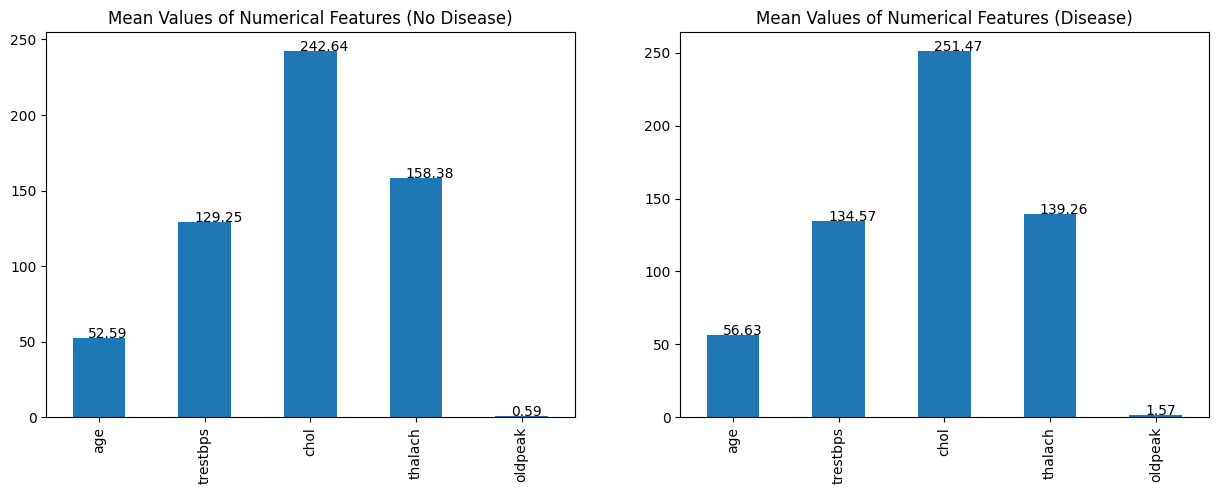

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Calculate mean values for numerical features with no disease
mean_values_0 = heart_data[heart_data['target'] == 0][numerical_features].mean()

# Calculate mean values for numerical features with disease
mean_values_1 = heart_data[heart_data['target'] == 1][numerical_features].mean()

# Plot bar graphs for mean values
mean_values_0.plot(kind='bar', ax=axs[0])
for i, v in enumerate(mean_values_0):
    axs[0].text(i-0.1, v+0.1, str(round(v, 2)))
axs[0].set_title('Mean Values of Numerical Features (No Disease)')

mean_values_1.plot(kind='bar', ax=axs[1])
for i, v in enumerate(mean_values_1):
    axs[1].text(i-0.1, v+0.1, str(round(v, 2)))
axs[1].set_title('Mean Values of Numerical Features (Disease)')

plt.show()


pairplot for numerical features specifically for individuals with heart disease. This plot shows scatter plots for each pair of numerical features and histograms along the diagonal.


Age: Age is often considered a significant factor in heart disease, and exploring its relationship with other variables can provide insights.

trestbps (Resting Blood Pressure): Blood pressure is a critical health indicator, and understanding its relationship with other variables can be informative.

chol (Cholesterol): Cholesterol levels are associated with heart health, and exploring their relationship with other variables can be valuable.

thalach (Maximum Heart Rate Achieved): The maximum heart rate achieved during exercise is relevant to heart health, and its relationship with other variables is worth exploring.

oldpeak (ST Depression Induced by Exercise Relative to Rest): ST depression induced by exercise can provide information about the heart's response to stress, and its relationship with other variables is of interest.

# Model Define


---


splliting the features(age,sex,chloe etc) and target (1 or 0)


In [ ]:
1 #making 2 variables where in X we store features and in Y we store target.

X = heart_data.drop(columns="target", axis=1) #no target coloum (independent value)

Y = heart_data["target"] #contains target (dependent value)



In [ ]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   0       145   233    1        2      150      0      2.3   
1     67    1   3       160   286    0        2      108      1      1.5   
2     67    1   3       120   229    0        2      129      1      2.6   
3     37    1   2       130   250    0        0      187      0      3.5   
4     41    0   1       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   0       110   264    0        0      132      0      1.2   
299   68    1   3       144   193    1        0      141      0      3.4   
300   57    1   3       130   131    0        0      115      1      1.2   
301   57    0   1       130   236    0        2      174      0      0.0   
302   38    1   2       138   175    0        0      173      0      0.0   

     slope  ca  thal  
0        2   0     2  
1        1   3     1  
2        1   2    

In [ ]:
print(Y) #only target columns

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: target, Length: 303, dtype: int64


# Machine learning algoritme:


---


Splliting data into training data, validation data and test data.

In [ ]:
1 #test data:20% which is 61
#train data: 80% which is 242
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, stratify=Y_train, random_state=2)

In [ ]:
# x.shape = orignal data
# x.train = training data
# x.val.shape = validation data
# x.test = testing data

print(X.shape, X_train.shape, X_val.shape, X_test.shape)


(303, 13) (193, 13) (49, 13) (61, 13)


# Train machine learning model.


---






*   using logistic regression.



In [ ]:
1 # declare a model in logistic regression

model = LogisticRegression()

In [ ]:
1 # training the logisticRegression model with training data.
# model.fit = it will try to fit the x train and y train. it will find relationship between feature and corresponing target.

model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluting.

---







accuracy score as our evaluation metric.


*   model will be asked to predict the target and this predicted value will be compared with the orignal target value.
*   for example if the model predicts 60 values then the accuracy is 60%



training prediction:

**accuracy = (number of correct predictions) / (total number of predictions) **

In [ ]:
1 #accuracy on training data
#comparing x_train with logistic train regression model
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train) #using accuracy score function

In [ ]:
print("Accuracy on Training data:", round(training_data_accuracy*100,2), "%") # 2 means 2 decimal values

Accuracy on Training data: 88.08 %


validation set:

In [ ]:
# Evaluate on the validation set
X_val_prediction = model.predict(X_val)
validation_data_accuracy = accuracy_score(X_val_prediction, Y_val)

In [ ]:
print("Accuracy on Validation data:", round(validation_data_accuracy * 100, 2), "%")

Accuracy on Validation data: 79.59 %


test prediction:

In [ ]:
1 #accuracy on test data
#comparing x_train with logistic test regression model
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test) #using accuracy score function

In [ ]:
print("Accuracy on Test data:", round(test_data_accuracy*100,2), "%")

Accuracy on Test data: 81.97 %


Conclusion: the accuracy on test data and training data is almost similar.

Therefore we don't have an overfitting issue in this data set. we have good result here.



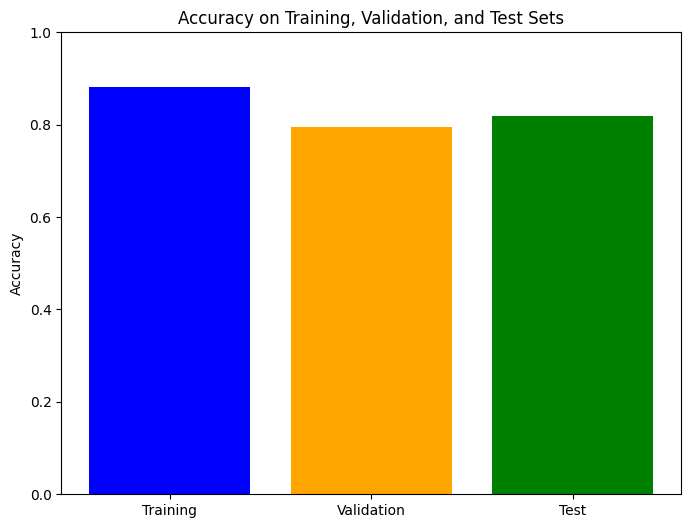

In [ ]:
# Assuming you have calculated accuracy scores
accuracy_scores = [training_data_accuracy, validation_data_accuracy, test_data_accuracy]
labels = ['Training', 'Validation', 'Test']

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracy_scores, color=['blue', 'orange', 'green'])
plt.title('Accuracy on Training, Validation, and Test Sets')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.show()


# Regularization

**With Regularization**

In [ ]:
model = LogisticRegression(penalty='l2', C=1.0)
# C is the inverse of regularization strength

# Fit the model to the training data
model.fit(X_train, Y_train)

# Make predictions on the test set
pre = model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(Y_test, pre)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 81.97


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Without Regularization**

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

# Make predictions on the test set
pre1 = model.predict(X_test)

#Evaluate the accuracy
accuracy = accuracy_score(Y_test, pre1)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 81.97


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


we are using L2, (penalty='l2') because it is a common choice, and it generally works well in practice. L2 regularization often helps to smooth out the impact of individual features and can be effective in preventing overfitting



# Feed forward netural network

In [ ]:
# Create a feedforward neural network
model = Sequential()

#input layer
model.add(Dense(units=68, activation='relu', input_dim=X_train.shape[1]))

#Hidden layers
model.add(Dense(units=58, activation='relu'))
model.add(Dense(units=34, activation='relu'))

# Output layer for binary classification with 1 neurons
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))
#The model is trained on the training data (X_train, Y_train) for 10 epochs (complete passes through the entire training dataset) with a batch size of 32

#Evaluate the model on the test set
accuracy = model.evaluate(X_test, Y_test)[1]
print('Test Accuracy: %.2f' % (accuracy*100))


Epoch 1/10
7/7 [==============================] - 2s 25ms/step - loss: 11.6963 - accuracy: 0.5026 - val_loss: 6.9422 - val_accuracy: 0.5410
Epoch 2/10
7/7 [==============================] - 0s 5ms/step - loss: 7.4943 - accuracy: 0.5389 - val_loss: 1.3426 - val_accuracy: 0.5738
Epoch 3/10
7/7 [==============================] - 0s 5ms/step - loss: 2.3978 - accuracy: 0.5337 - val_loss: 1.6829 - val_accuracy: 0.5246
Epoch 4/10
7/7 [==============================] - 0s 5ms/step - loss: 1.6888 - accuracy: 0.5544 - val_loss: 1.8857 - val_accuracy: 0.6066
Epoch 5/10
7/7 [==============================] - 0s 8ms/step - loss: 1.4782 - accuracy: 0.6062 - val_loss: 0.9428 - val_accuracy: 0.6230
Epoch 6/10
7/7 [==============================] - 0s 8ms/step - loss: 1.3520 - accuracy: 0.5959 - val_loss: 0.7465 - val_accuracy: 0.6393
Epoch 7/10
7/7 [==============================] - 0s 9ms/step - loss: 1.0513 - accuracy: 0.6269 - val_loss: 0.4840 - val_accuracy: 0.8197
Epoch 8/10
7/7 [================


*   relu activation function: it intrduces non-linearity by outputing the input for positive values and zero for negative values
*   sigmoid activation function:  It squashes the output between 0 and 1, making it suitable for binary classification problems where the goal is to output probabilities.













2/2 [==============================] - 0s 4ms/step


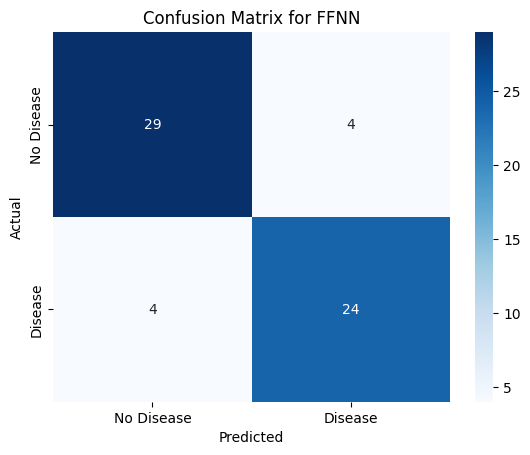

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)
predictions_binary = (predictions > 0.5).astype(int)

# Create a confusion matrix
cm = confusion_matrix(Y_test, predictions_binary)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix for FFNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Precision = true positive / true positive + false positive


---


Precision = 29 / (29 + 4)
Precision = 0.878



---




88% of the positive predictions made by the classification model were correct

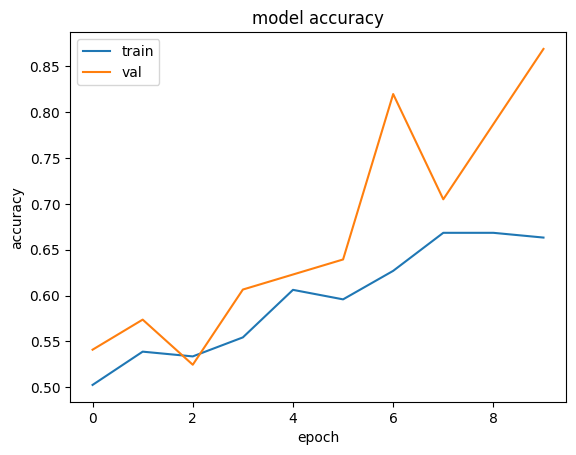

In [ ]:
# Plot the model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# building a predictive system:

here we will give all the feature values and this model will predict if the person has a disease or not.

In [ ]:
1 # get input values (feature values excluding target value) and see if the model predicts the right disease.

input_data = (63,1,0,145,233,1,2,150,0,2.3,2,0,2) #added random feature data from dataset to see if it gives the correct target value.

# change the input data to numpy array because we have to do processing

input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array otherwise it will predict all of the data. specify that we only want one instance.

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)


1/1 [==============================] - 0s 56ms/step


In [ ]:
#print the prediction with message:
# Check if the rounded prediction value is 0 or 1
if prediction == 0:
    print("The person does not have heart disease.")
else:
    print("The person has heart disease.")

The person has heart disease.


Text(50.722222222222214, 0.5, 'Actual')

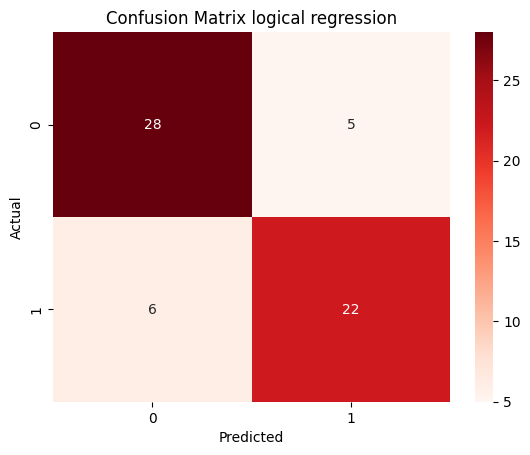

In [ ]:
cm = confusion_matrix(Y_test, X_test_prediction)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix logical regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

*Precision = true positive / true positive + false positive *

---

Precision = 28 / (28 + 5)
precision = 0.848

---
85% of the positive predictions made by the classification model were correct